# Machine Learning e Data Science com Python de A à Z

# Classificação de textos com spaCy

## Etapa 1: Importação e instalçao das bibliotecas

In [1]:
import spacy
spacy.__version__

'3.7.4'

In [2]:
import pandas as pd
import string
import spacy
import random
import seaborn as sns
import numpy as np

## Etapa 2: Carregamento da base de dados

In [3]:
base_dados = pd.read_csv('base_treinamento.txt', encoding = 'utf-8')

In [4]:
base_dados.shape

(196, 2)

In [5]:
base_dados.head()

,texto,emocao
0,este trabalho é agradável,alegria
1,gosto de ficar no seu aconchego,alegria
2,fiz a adesão ao curso hoje,alegria
3,eu sou admirada por muitos,alegria
4,adoro como você,alegria


In [6]:
base_dados.tail()

,texto,emocao
191,estou chocado e amedrontado com este assassina...,medo
192,é preciso afugenta com ímpeto este medo do inf...,medo
193,políticos usam suas forças para afugentar e am...,medo
194,o objetivo disso e apenas me amedrontar mais,medo
195,isso me apavora,medo


In [7]:
base_dados['emocao'].value_counts()

alegria    112
medo        84
Name: emocao, dtype: int64

In [8]:
x = base_dados['emocao'].value_counts()
y = base_dados['emocao'].value_counts()

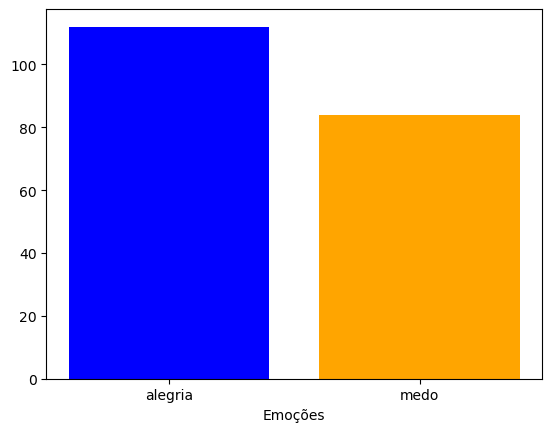

In [9]:
import matplotlib.pyplot as plt
colors = ['blue', 'orange']
plt.bar(x.index, y, color=colors)
plt.xlabel('Emoções')
plt.show()

## Etapa 3: Função para pré-processamento dos textos

In [10]:
pontuacoes = string.punctuation
pontuacoes

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [11]:
from spacy.lang.pt.stop_words import STOP_WORDS
stop_words = STOP_WORDS

In [12]:
print(stop_words)

{'tempo', 'são', 'três', 'aquelas', 'desse', 'aquela', 'sim', 'inicio', 'fostes', 'inclusive', 'números', 'tendes', 'umas', 'usa', 'ainda', 'maioria', 'vossos', 'meu', 'mês', 'estás', 'em', 'com', 'nossa', 'podia', 'onde', 'nossos', 'minha', 'fazem', 'forma', 'somos', 'custa', 'tente', 'cá', 'dezanove', 'povo', 'próximo', 'sabe', 'cinco', 'certamente', 'zero', 'desde', 'direita', 'nenhuma', 'partir', 'nas', 'fim', 'agora', 'breve', 'dessa', 'foi', 'além', 'fez', 'eles', 'estava', 'tipo', 'certeza', 'como', 'quê', 'ora', 'embora', 'sem', 'próprio', 'vindo', 'vez', 'segundo', 'oitavo', 'estou', 'por', 'se', 'vós', 'nesse', 'então', 'novos', 'parte', 'poder', 'terceiro', 'fazia', 'foste', 'numa', 'estão', 'pôde', 'estiveste', 'iniciar', 'duas', 'estivestes', 'lado', 'conselho', 'conhecida', 'grande', 'diz', 'dizer', 'e', 'põem', 'cedo', 'tiveram', 'teu', 'novas', 'ser', 'quieta', 'pouca', 'é', 'longe', 'maiorias', 'seis', 'dezoito', 'já', 'bastante', 'vários', 'contra', 'quarto', 'vezes',

In [13]:
len(stop_words)

416

In [14]:
pln = spacy.load('pt_core_news_sm')
pln

In [15]:
def preprocessamento(texto):
    texto = texto.lower()
    documento = pln(texto)
    
    lista = []
    for token in documento:
        # lista.append(token.text)
        lista.append(token.lemma_)
        
    lista = [palavra for palavra in lista if palavra not in stop_words and palavra not in pontuacoes]
    lista = ' '.join([str(elemento) for elemento in lista if not elemento.isdigit()])
    
    return lista

In [16]:
teste = preprocessamento('Estou aprendendo 1 10 23 74 processamento de linguagem natural, curso em Fortaleza')
teste

'aprender processamento linguagem natural curso fortaleza'

## Etapa 4: Pré-processamento da base de dados

### Limpeza dos textos

In [17]:
base_dados.head(10)

,texto,emocao
0,este trabalho é agradável,alegria
1,gosto de ficar no seu aconchego,alegria
2,fiz a adesão ao curso hoje,alegria
3,eu sou admirada por muitos,alegria
4,adoro como você,alegria
5,adoro seu cabelo macio,alegria
6,adoro a cor dos seus olhos,alegria
7,somo tão amáveis um com o outro,alegria
8,sinto uma grande afeição por ele,alegria
9,quero agradar meus filhos,alegria


In [18]:
base_dados['texto'] = base_dados['texto'].apply(preprocessamento)

In [19]:
base_dados.head(10)

,texto,emocao
0,trabalho agradável,alegria
1,gosto ficar em o aconchego,alegria
2,fiz adesão a o curso hoje,alegria
3,admirar,alegria
4,adorar,alegria
5,adorar cabelo macio,alegria
6,adorar cor de o olho,alegria
7,somo amável outro,alegria
8,sinto afeição,alegria
9,querer agradar filho,alegria


### Tratamento da classe

In [20]:
exemplo_base_dados = [["este trabalho é agradável", {"ALEGRIA": True, "MEDO": False}],
                      ["este lugar continua assustador", {"ALEGRIA": False, "MEDO": True}]]

In [21]:
type(exemplo_base_dados)

list

In [22]:
exemplo_base_dados[0]

['este trabalho é agradável', {'ALEGRIA': True, 'MEDO': False}]

In [23]:
exemplo_base_dados[0][0]

'este trabalho é agradável'

In [24]:
exemplo_base_dados[0][1]

{'ALEGRIA': True, 'MEDO': False}

In [25]:
type(exemplo_base_dados[0][1])

dict

In [26]:
base_dados_final = []

for texto, emocao in zip(base_dados['texto'], base_dados['emocao']):
    # print(texto, emocao)
    if emocao == 'alegria':
        dictionary = ({"ALEGRIA": True, "MEDO": False})
    elif emocao == 'medo':
        dictionary = ({"ALEGRIA": False, "MEDO": True})
        
    base_dados_final.append([texto, dictionary.copy()])

In [27]:
len(base_dados_final)

196

In [28]:
base_dados_final[0]

['trabalho agradável', {'ALEGRIA': True, 'MEDO': False}]

In [29]:
base_dados_final[0][0]

'trabalho agradável'

In [30]:
base_dados_final[0][1]

{'ALEGRIA': True, 'MEDO': False}

In [31]:
type(base_dados_final[0][1])

dict

In [32]:
base_dados_final

[['trabalho agradável', {'ALEGRIA': True, 'MEDO': False}],
 ['gosto ficar em o aconchego', {'ALEGRIA': True, 'MEDO': False}],
 ['fiz adesão a o curso hoje', {'ALEGRIA': True, 'MEDO': False}],
 ['admirar', {'ALEGRIA': True, 'MEDO': False}],
 ['adorar', {'ALEGRIA': True, 'MEDO': False}],
 ['adorar cabelo macio', {'ALEGRIA': True, 'MEDO': False}],
 ['adorar cor de o olho', {'ALEGRIA': True, 'MEDO': False}],
 ['somo amável outro', {'ALEGRIA': True, 'MEDO': False}],
 ['sinto afeição', {'ALEGRIA': True, 'MEDO': False}],
 ['querer agradar filho', {'ALEGRIA': True, 'MEDO': False}],
 ['sinto completamente amar', {'ALEGRIA': True, 'MEDO': False}],
 ['amo', {'ALEGRIA': True, 'MEDO': False}],
 ['alívio', {'ALEGRIA': True, 'MEDO': False}],
 ['dor amenizar finalmente', {'ALEGRIA': True, 'MEDO': False}],
 ['achar apaixoneir', {'ALEGRIA': True, 'MEDO': False}],
 ['amar maravilhoso', {'ALEGRIA': True, 'MEDO': False}],
 ['sentir animar', {'ALEGRIA': True, 'MEDO': False}],
 ['sintar hoje', {'ALEGRIA': Tr

## Etapa 5: Criação do classificador

In [33]:
from spacy.training import Example

In [34]:
modelo = spacy.blank('pt')
categorias = modelo.add_pipe("textcat")
categorias.add_label("ALEGRIA")
categorias.add_label("MEDO")
historico = []

In [35]:
modelo.begin_training()
for epoca in range(1000):
    random.shuffle(base_dados_final)
    losses = {}
    for batch in spacy.util.minibatch(base_dados_final, 30):
        textos = [modelo(texto) for texto, entities in batch]
        annotations = [{'cats': entities} for texto, entities in batch]
        examples = [Example.from_dict(doc, annotation) for doc, annotation in zip(textos, annotations)]
        modelo.update(examples, losses=losses)
    if epoca % 100 == 0:
        print(losses)
        historico.append(losses)

{'textcat': 1.697337731719017}
{'textcat': 3.304133485912408e-11}
{'textcat': 3.995459074267876e-12}
{'textcat': 1.0576417129246063e-12}
{'textcat': 3.6984817470978384e-13}
{'textcat': 1.681966655661454e-13}
{'textcat': 7.635854424006458e-14}
{'textcat': 3.433838258598283e-14}
{'textcat': 1.83228681666019e-14}
{'textcat': 1.0870495531470386e-14}


In [36]:
historico_loss = []
for i in historico:
    historico_loss.append(i.get('textcat'))

In [37]:
historico_loss = np.array(historico_loss)
historico_loss

array([1.69733773e+00, 3.30413349e-11, 3.99545907e-12, 1.05764171e-12,
       3.69848175e-13, 1.68196666e-13, 7.63585442e-14, 3.43383826e-14,
       1.83228682e-14, 1.08704955e-14])

Text(0, 0.5, 'Erro')

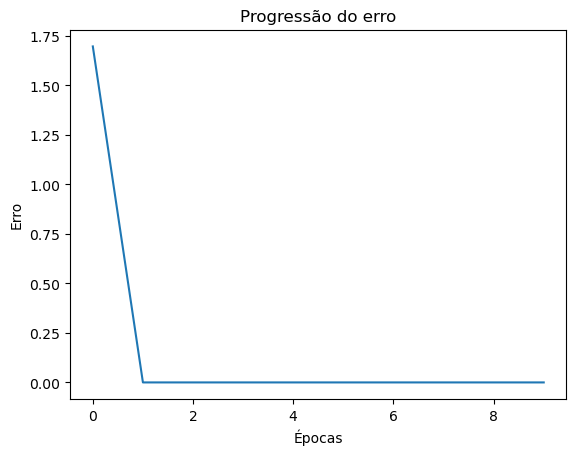

In [38]:
import matplotlib.pyplot as plt
plt.plot(historico_loss)
plt.title('Progressão do erro')
plt.xlabel('Épocas')
plt.ylabel('Erro')

In [39]:
modelo.to_disk("modelo")

## Etapa 6: Testes com uma frase

In [40]:
modelo_carregado = spacy.load("modelo")
modelo_carregado

In [41]:
texto_positivo = "eu adoro a cor dos seus olhos"

In [42]:
texto_positivo = preprocessamento(texto_positivo)
texto_positivo

'adorar cor de o olho'

In [43]:
previsao = modelo_carregado(texto_positivo)
previsao

adorar cor de o olho

In [44]:
teste = previsao.cats

In [45]:
texto_negativo = "estou com medo dele"
previsao = modelo_carregado(preprocessamento(texto_negativo))
previsao.cats

{'ALEGRIA': 3.746387733372103e-07, 'MEDO': 0.9999996423721313}

## Etapa 7: Avaliação do modelo

### Avaliação na base de treinamento

In [46]:
previsoes = []
for texto in base_dados['texto']:
    # print(texto)
    previsao = modelo_carregado(texto)
    previsoes.append(previsao.cats)

In [47]:
previsoes

[{'ALEGRIA': 1.0, 'MEDO': 3.816696292346933e-09},
 {'ALEGRIA': 1.0, 'MEDO': 1.732682797239704e-08},
 {'ALEGRIA': 1.0, 'MEDO': 1.4627516087273307e-08},
 {'ALEGRIA': 1.0, 'MEDO': 1.630352208792374e-08},
 {'ALEGRIA': 1.0, 'MEDO': 6.928499995950688e-09},
 {'ALEGRIA': 1.0, 'MEDO': 1.502486490778665e-08},
 {'ALEGRIA': 1.0, 'MEDO': 3.8328568763290605e-08},
 {'ALEGRIA': 1.0, 'MEDO': 2.1014185946910402e-08},
 {'ALEGRIA': 1.0, 'MEDO': 1.5092794569682155e-08},
 {'ALEGRIA': 1.0, 'MEDO': 3.495845390943941e-08},
 {'ALEGRIA': 1.0, 'MEDO': 5.288133930747563e-09},
 {'ALEGRIA': 1.0, 'MEDO': 1.7596127221963798e-08},
 {'ALEGRIA': 1.0, 'MEDO': 3.0686333474250205e-09},
 {'ALEGRIA': 1.0, 'MEDO': 1.0795676352870487e-08},
 {'ALEGRIA': 1.0, 'MEDO': 4.3173358221793023e-08},
 {'ALEGRIA': 1.0, 'MEDO': 6.776242678085964e-09},
 {'ALEGRIA': 1.0, 'MEDO': 3.751038235577653e-08},
 {'ALEGRIA': 1.0, 'MEDO': 1.0524918714338583e-08},
 {'ALEGRIA': 1.0, 'MEDO': 1.587283904314063e-08},
 {'ALEGRIA': 1.0, 'MEDO': 2.6988255186211

In [48]:
previsoes_final = []
for previsao in previsoes:
    if previsao['ALEGRIA'] > previsao['MEDO']:
        previsoes_final.append('alegria')
    else:
        previsoes_final.append('medo')
        
previsoes_final = np.array(previsoes_final)

In [49]:
previsoes_final

array(['alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 

In [50]:
respostas_reais = base_dados['emocao'].values
respostas_reais

array(['alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 

In [51]:
from sklearn.metrics import confusion_matrix, accuracy_score
accuracy_score(respostas_reais, previsoes_final)

1.0

In [52]:
cm = confusion_matrix(respostas_reais, previsoes_final)
cm

array([[112,   0],
       [  0,  84]], dtype=int64)

### Avaliação na base de teste

In [53]:
base_dados_teste = pd.read_csv('base_teste.txt', encoding='utf-8')

In [54]:
base_dados_teste.head()

,texto,emocao
0,não precisei pagar o ingresso,alegria
1,se eu ajeitar tudo fica bem,alegria
2,minha fortuna ultrapassará a sua,alegria
3,sou muito afortunado,alegria
4,é benéfico para todos esta nova medida,alegria


In [55]:
base_dados_teste['texto'] = base_dados_teste['texto'].apply(preprocessamento)

In [56]:
base_dados_teste.head()

,texto,emocao
0,precisar pagar ingresso,alegria
1,ajeitar ficar,alegria
2,fortuna ultrapassar,alegria
3,afortunar,alegria
4,benéfico medida,alegria


In [57]:
previsoes = []
for texto in base_dados_teste['texto']:
    #print(texto)
    previsao = modelo_carregado(texto)
    previsoes.append(previsao.cats)

In [58]:
previsoes

[{'ALEGRIA': 5.381020855566021e-07, 'MEDO': 0.9999994039535522},
 {'ALEGRIA': 0.999454915523529, 'MEDO': 0.0005450776079669595},
 {'ALEGRIA': 0.007190716452896595, 'MEDO': 0.9928092956542969},
 {'ALEGRIA': 1.0, 'MEDO': 2.3449770125694158e-08},
 {'ALEGRIA': 0.9995930790901184, 'MEDO': 0.0004069893911946565},
 {'ALEGRIA': 0.5407457947731018, 'MEDO': 0.4592541754245758},
 {'ALEGRIA': 1.91455619642511e-05, 'MEDO': 0.9999808073043823},
 {'ALEGRIA': 0.9999904632568359, 'MEDO': 9.582248821971007e-06},
 {'ALEGRIA': 1.0, 'MEDO': 2.879456850735096e-08},
 {'ALEGRIA': 0.9999971389770508, 'MEDO': 2.8317508622421883e-06},
 {'ALEGRIA': 0.9997028708457947, 'MEDO': 0.00029715310665778816},
 {'ALEGRIA': 0.010127619840204716, 'MEDO': 0.9898723363876343},
 {'ALEGRIA': 0.2588220536708832, 'MEDO': 0.7411779165267944},
 {'ALEGRIA': 0.9999994039535522, 'MEDO': 5.623140282295935e-07},
 {'ALEGRIA': 1.0, 'MEDO': 7.088990727766031e-09},
 {'ALEGRIA': 0.993187665939331, 'MEDO': 0.006812320556491613},
 {'ALEGRIA': 0

In [59]:
previsoes_final = []
for previsao in previsoes:
    if previsao['ALEGRIA'] > previsao['MEDO']:
        previsoes_final.append('alegria')
    else:
        previsoes_final.append('medo')
        
previsoes_final = np.array(previsoes_final)

In [60]:
previsoes_final

array(['medo', 'alegria', 'medo', 'alegria', 'alegria', 'alegria', 'medo',
       'alegria', 'alegria', 'alegria', 'alegria', 'medo', 'medo',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'medo',
       'medo', 'alegria', 'alegria', 'medo', 'alegria', 'medo', 'alegria',
       'alegria', 'alegria', 'medo', 'medo', 'alegria', 'alegria',
       'alegria', 'alegria', 'medo', 'medo', 'alegria', 'alegria', 'medo',
       'medo', 'medo', 'alegria', 'medo', 'medo', 'alegria', 'medo',
       'alegria', 'medo', 'alegria', 'alegria', 'medo', 'medo', 'alegria',
       'alegria', 'medo', 'medo', 'medo', 'medo', 'alegria', 'medo',
       'alegria', 'alegria', 'medo', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'medo', 'alegria', 'alegria', 'medo',
       'alegria', 'alegria', 'medo', 'medo', 'medo', 'medo', 'medo',
       'medo', 'alegria', 'alegria', 'medo', 'alegria'], dtype='<U7')

In [61]:
respostas_reais = base_dados_teste['emocao'].values

In [62]:
accuracy_score(respostas_reais, previsoes_final)

0.5357142857142857

In [63]:
cm = confusion_matrix(respostas_reais, previsoes_final)
cm

array([[28, 20],
       [19, 17]], dtype=int64)